In [172]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Network

In [132]:
def build_optimizer(loss, learning_rate, grad_clip):
    ''' Build optmizer for training, using gradient clipping.
    
        Arguments:
        loss: Network loss
        learning_rate: Learning rate for optimizer
    
    '''
    
    # Optimizer for training, using gradient clipping to control exploding gradients
    tvars = tf.trainable_variables()
    grads, _ = tf.clip_by_global_norm(tf.gradients(loss, tvars), grad_clip)
    train_op = tf.train.AdamOptimizer(learning_rate)
    optimizer = train_op.apply_gradients(zip(grads, tvars))
    
    return optimizer

In [133]:

graph=tf.Graph()


In [134]:
logs_dir = './graphs/'
batch_size=128
num_steps=365
lstm_layers= 1
lstm_size= 10
inputs_dim= 1
alpha = 0.1

In [135]:
with graph.as_default():
    inputs_ = tf.placeholder( tf.float32, [batch_size,num_steps, inputs_dim] , name='inputs')
    targets_ = tf.placeholder( tf.float32, [batch_size,num_steps, inputs_dim] , name='targets')
    learning_rate= tf.placeholder( tf.float32 , name='lr')
    grad_clip= tf.placeholder( tf.float32 , name='clip')

In [136]:

with graph.as_default():
    rnn_cell = tf.nn.rnn_cell.BasicRNNCell(lstm_size)

# 'outputs' is a tensor of shape [batch_size, max_time, cell_state_size]

# defining initial state
    initial_state = rnn_cell.zero_state(batch_size, dtype=tf.float32)

# 'state' is a tensor of shape [batch_size, cell_state_size]
    outputs, state = tf.nn.dynamic_rnn(rnn_cell, inputs_,
                                   initial_state=initial_state,
                                   dtype=tf.float32)

In [137]:
with graph.as_default():
    cost = tf.losses.mean_squared_error( outputs , targets_)
    optimizer= build_optimizer(cost, learning_rate, grad_clip)
    

## Batch

In [175]:
#constant trend
def batch_1(batch_size, num_steps):
    trend = np.zeros( num_steps+1)
    trend = np.reshape( trend, [-1,1])
    while True:
        batch = np.random.randn( batch_size,num_steps+1,1)
        for i in range(batch_size):
            batch[i,:,:]=batch[i,:,:]+trend[:,:]
        
        yield (batch[:,:-1,:] , batch[:,1:,:] )
#sin trend
def batch_2(batch_size, num_steps):
    trend = np.arange( num_steps+1)
    trend = np.sin(trend)
    trend = np.reshape( trend, [-1,1])
    while True:
        batch = np.random.randn( batch_size,num_steps+1,1)
        for i in range(batch_size):
            batch[i,:,:]=batch[i,:,:]+trend[:,:]
        
        yield (batch[:,:-1,:] , batch[:,1:,:] )
    

In [163]:
generator1 = batch_1(batch_size, num_steps )

In [176]:
generator2 = batch_2(batch_size, num_steps)

In [177]:
generator= generator2

## Training

In [140]:
writer.close()

In [179]:
writer = tf.summary.FileWriter(logs_dir, graph)
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        X,Y = next(generator)
        state = sess.run( initial_state)
        variables =tf.trainable_variables()
        feed = { inputs_: X,
                initial_state :state,
               targets_: Y ,
               learning_rate: 0.1,
               grad_clip: 0.1}
        sess.run( [optimizer], feed_dict=feed)
        result = sess.run( [cost, outputs], feed_dict=feed)
        if (i+1) %1 == 0 :
            print( result[0]-1)
        if (i+1)%100 == 0 :
            print( result[1][0,:,0])
writer.close()   

0.9832535982131958
0.9528293609619141
0.9300212860107422
0.9074397087097168
0.8603335618972778
0.8527271747589111
0.8030111789703369
0.7265464067459106
0.7000857591629028
0.6071577072143555
0.52471923828125
0.49521446228027344
0.5173002481460571
0.5436503887176514
0.5084223747253418
0.5071290731430054
0.5029256343841553
0.5036433935165405
0.47956204414367676
0.4909532070159912
0.4904313087463379
0.47300124168395996
0.455830454826355
0.45215916633605957
0.4323241710662842
0.43308067321777344
0.45009076595306396
0.44932007789611816
0.44224298000335693
0.4507873058319092
0.4570951461791992
0.46019136905670166
0.4541041851043701
0.46044254302978516
0.4518781900405884
0.44678032398223877
0.45210564136505127
0.43827342987060547
0.4477057456970215
0.412420392036438
0.4443613290786743
0.4401686191558838
0.43967580795288086
0.4355098009109497
0.46063363552093506
0.4393538236618042
0.44059455394744873
0.4388843774795532
0.46172094345092773
0.44314026832580566
0.43301379680633545
0.45475602149963

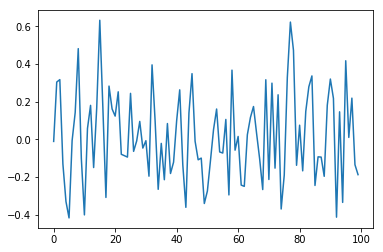

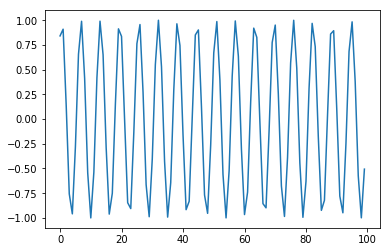

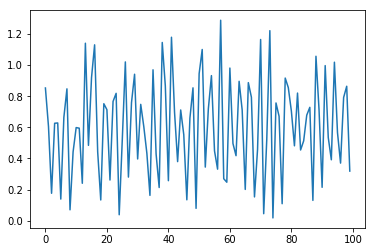

In [209]:
n= 100
plt.plot( result[1][0,0:n,0] )
plt.show()
plt.plot( trend[1:n+1])
plt.show()
plt.plot( np.abs(result[1][0,0:n,0] -trend[1:n+1] ) )
plt.show()